<a href="https://colab.research.google.com/github/eliasfrivas/DataScienceII/blob/main/ProyectoDSParteI%2BRivas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚀 Proyecto Final: Obtención y Procesamiento de Datos del Clima con Weather.gov API

**Autor/a:** Elias Rivas

**Curso:** Machine Learning para la Ciencia de Datos

---




## 1. Definición del Proyecto y Preguntas de Interés 🎯
Este proyecto se enfoca en la extracción y análisis de datos de canales de la información meteorológica utilizando APIs públicas. El proyecto busca acceder y procesar datos del clima a través de la API de Weather.gov.

### 1.1. Motivación y Audiencia
Motivación: El proyecto me parecio analizar las alertas metereologicas sobre el Clima en diferentes regiones de EUA

Audiencia: Enfocado en la Comunidad. Dar avisos de Emergencias, Evacuaciones y Evitar posibles perdidas

### 1.2. Preguntas o Hipótesis Iniciales

Pregunta 1: ¿Cuales son las Alertas mas importantes?

Pregunta 2: Segun la Severidad de la Alerta ¿cual es la Urgencia?

Pregunta 3: ¿Cuales son las Instruccionse que se deben comunicar a la Comunidad?

# 2. Adquisición de Datos (Data Acquisition) ☔

2.1 Importa las librerías necesarias (ej. requests, pandas).

In [247]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2.2 Define tus credenciales de API (si aplica). ¡Recuerda no compartir tu API Key o Tokens en un notebook público!

In [248]:
#Llamado a la API seleccionada https://api.weather.gov/ en este caso no posee credenciales!!
response = requests.get("https://api.weather.gov/")

if response.status_code == 200:

    print("API Conexion exitosa!")

else:
    print(f"API Hubo un Error. Codigo: {response.status_code}")
    print(response.text)

API Conexion exitosa!


2.3 Realiza las llamadas a la API para obtener los datos. Explica qué endpoints estás utilizando.

2.4 Convierte la respuesta JSON a un DataFrame de Pandas.

In [249]:
# Llamado a la API utilizando el Endpiont /alerts/active
alerts_url = "https://api.weather.gov/alerts/active"

try:
  # Realizamos la solicitud GET a la API para alertas activas
  alerts_response = requests.get(alerts_url)

  # Comprobamos si la solicitud fue exitosa (código de estado 200)
  if alerts_response.status_code == 200:
    # Convertimos la respuesta en un dataframe con .json()
    alerts_data = alerts_response.json()

    print("¡Se recuperaron exitosamente las alertas activas de la API de Weather.gov!")

    # Los datos de alerta reales normalmente se encuentran en la lista de "features".
    if 'features' in alerts_data:
      alerts_list = alerts_data['features']

      if alerts_list:
        print(f"Encontramos {len(alerts_list)} Alertas Activas.")

        # Conviertimos la lista de diccionarios (features) en un DataFrame de pandas
        # Cada función tiene una clave de "properties" que contiene los detalles de la alerta.
        df_alerts = pd.DataFrame([alert['properties'] for alert in alerts_list])

        print("\nDataFrame de Alertas Activas:")
        # Muestra del DataFrame, centrándose en columnas clave como evento, gravedad, áreaDesc
        display(df_alerts[['event', 'severity', 'areaDesc', 'headline', 'sent', 'ends']].head()) # Vemos las primeras Alertas

      else:
        print("No se encontraron alertas activas en este momento.")

    else:
      print("No se pudieron encontrar 'features' en la respuesta de alertas.")


  elif alerts_response.status_code == 404:
    print("Error: No se encontró el punto final de alertas. Verifique la URL.")
  elif alerts_response.status_code == 403:
    print("Error: Asegúrate de tener los permisos necesarios.")
  else:
    print(f"Error: La solicitud de API de alertas falló con el código de estado {alerts_response.status_code}")
    print(f"Respuesta: {alerts_response.text}")

except requests.exceptions.RequestException as e:
  print(f"Se produjo un error durante la solicitud de API de alertas: {e}")
except Exception as e:
  print(f"Se produjo un error inesperado al procesar las alertas: {e}")

¡Se recuperaron exitosamente las alertas activas de la API de Weather.gov!
Encontramos 230 Alertas Activas.

DataFrame de Alertas Activas:


,event,severity,areaDesc,headline,sent,ends
0,Special Weather Statement,Moderate,Franklin; Bedford,Special Weather Statement issued July 9 at 2:0...,2025-07-09T14:07:00-04:00,None
1,Flash Flood Warning,Severe,"Harrison, OH; Jefferson, OH",Flash Flood Warning issued July 9 at 2:07PM ED...,2025-07-09T14:07:00-04:00,2025-07-09T17:00:00-04:00
2,Small Craft Advisory,Minor,S of Currituck Beach Light NC to Oregon Inlet ...,Small Craft Advisory issued July 9 at 2:06PM E...,2025-07-09T14:06:00-04:00,2025-07-10T00:00:00-04:00
3,Small Craft Advisory,Minor,Croatan and Roanoke Sounds,Small Craft Advisory issued July 9 at 2:06PM E...,2025-07-09T14:06:00-04:00,2025-07-10T01:00:00-04:00
4,Small Craft Advisory,Minor,S of Ocracoke Inlet NC to Cape Lookout NC out ...,Small Craft Advisory issued July 9 at 2:06PM E...,2025-07-09T14:06:00-04:00,2025-07-10T02:00:00-04:00


2.5 Guarda el DataFrame crudo en un archivo .csv o .json en tu entorno. Esto te permitirá cargar los datos directamente en futuras sesiones sin necesidad de volver a llamar a la API.

In [250]:
# Guardamos el DataFrame en un archivo CSV
output_filename = 'weather_alerts_data.csv'
df_alerts.to_csv(output_filename, index=False)
print(f"Datos guardados en {output_filename}")

# Descarga del archivo a su Carpeta Local: Descargas
from google.colab import files
files.download(output_filename)

Datos guardados en weather_alerts_data.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#  3. Limpieza y Transformación de Datos (Data Wrangling) ⚡

 3.1. Carga y Diagnóstico Inicial
Carga tu dataset desde el archivo local que guardaste.
Realiza un diagnóstico completo usando .info(), .describe(), .shape, y .isnull().sum() para entender el estado inicial de tus datos.

In [251]:
# Al archivo descargado 'weather_alerts_data.csv' lo guarde en mi Drive de Google el dia 07/07

from google.colab import drive
drive.mount('/content/drive')

Archivo = '/content/drive/My Drive/weather_alerts_data.csv'
try:
   df_drive = pd.read_csv(Archivo)
   print(f"Dataset '{Archivo}' cargado exitosamente desde Google Drive.")
   display(df_drive.head())
except FileNotFoundError:
   print(f"Error: El Dataset '{Archivo}' no fue encontrado en Google Drive.")
except Exception as e:
   print(f"Se produjo un error al cargar el conjunto de datos desde Google Drive: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset '/content/drive/My Drive/weather_alerts_data.csv' cargado exitosamente desde Google Drive.


,@id,@type,id,areaDesc,geocode,affectedZones,references,sent,effective,onset,...,headline,description,instruction,response,parameters,scope,code,language,web,eventCode
0,https://api.weather.gov/alerts/urn:oid:2.49.0....,wx:Alert,urn:oid:2.49.0.1.840.0.4229517e0027c4b85219277...,"Cheyenne, NE","{'SAME': ['031033'], 'UGC': ['NEC033']}",['https://api.weather.gov/zones/county/NEC033'],[{'@id': 'https://api.weather.gov/alerts/urn:o...,2025-07-07T16:33:00-06:00,2025-07-07T16:33:00-06:00,2025-07-07T16:33:00-06:00,...,Severe Thunderstorm Warning issued July 7 at 4...,"At 432 PM MDT, a severe thunderstorm was locat...",For your protection move to an interior room o...,Shelter,"{'AWIPSidentifier': ['SVSCYS'], 'WMOidentifier...",Public,IPAWSv1.0,en-US,http://www.weather.gov,"{'SAME': ['SVS'], 'NationalWeatherService': ['..."
1,https://api.weather.gov/alerts/urn:oid:2.49.0....,wx:Alert,urn:oid:2.49.0.1.840.0.1cf0ca3b071d79bcfb5cccb...,"Broome, NY; Chenango, NY; Tioga, NY","{'SAME': ['036007', '036017', '036107'], 'UGC'...",['https://api.weather.gov/zones/county/NYC007'...,[],2025-07-07T18:33:00-04:00,2025-07-07T18:33:00-04:00,2025-07-07T18:33:00-04:00,...,Severe Thunderstorm Warning issued July 7 at 6...,SVRBGM\n\nThe National Weather Service in Bing...,For your protection move to an interior room o...,Shelter,"{'AWIPSidentifier': ['SVRBGM'], 'WMOidentifier...",Public,IPAWSv1.0,en-US,http://www.weather.gov,"{'SAME': ['SVR'], 'NationalWeatherService': ['..."
2,https://api.weather.gov/alerts/urn:oid:2.49.0....,wx:Alert,urn:oid:2.49.0.1.840.0.f9477b7dcd0037fd0edbf14...,"Clinton, PA; Lycoming, PA","{'SAME': ['042035', '042081'], 'UGC': ['PAC035...",['https://api.weather.gov/zones/county/PAC035'...,[{'@id': 'https://api.weather.gov/alerts/urn:o...,2025-07-07T18:33:00-04:00,2025-07-07T18:33:00-04:00,2025-07-07T18:33:00-04:00,...,Severe Thunderstorm Warning issued July 7 at 6...,"At 632 PM EDT, severe thunderstorms were locat...",Stay inside a well built structure and keep aw...,Shelter,"{'AWIPSidentifier': ['SVSCTP'], 'WMOidentifier...",Public,IPAWSv1.0,en-US,http://www.weather.gov,"{'SAME': ['SVS'], 'NationalWeatherService': ['..."
3,https://api.weather.gov/alerts/urn:oid:2.49.0....,wx:Alert,urn:oid:2.49.0.1.840.0.9789ae00af144c79f1d6220...,"Columbiana, OH; Beaver, PA; Butler, PA","{'SAME': ['039029', '042007', '042019'], 'UGC'...",['https://api.weather.gov/zones/county/OHC029'...,[{'@id': 'https://api.weather.gov/alerts/urn:o...,2025-07-07T18:32:00-04:00,2025-07-07T18:32:00-04:00,2025-07-07T18:32:00-04:00,...,Severe Thunderstorm Warning issued July 7 at 6...,"At 631 PM EDT, severe thunderstorms were locat...",For your protection move to an interior room o...,Shelter,"{'AWIPSidentifier': ['SVSPBZ'], 'WMOidentifier...",Public,IPAWSv1.0,en-US,http://www.weather.gov,"{'SAME': ['SVS'], 'NationalWeatherService': ['..."
4,https://api.weather.gov/alerts/urn:oid:2.49.0....,wx:Alert,urn:oid:2.49.0.1.840.0.6868bbd51c8b8cddabba252...,"Cass, ND","{'SAME': ['038017'], 'UGC': ['NDC017']}",['https://api.weather.gov/zones/county/NDC017'],[],2025-07-07T17:32:00-05:00,2025-07-07T17:32:00-05:00,2025-07-07T17:32:00-05:00,...,Severe Thunderstorm Warning issued July 7 at 5...,SVRFGF\n\nThe National Weather Service in Gran...,For your protection move to an interior room o...,Shelter,"{'AWIPSidentifier': ['SVRFGF'], 'WMOidentifier...",Public,IPAWSv1.0,en-US,http://www.weather.gov,"{'SAME': ['SVR'], 'NationalWeatherService': ['..."


In [252]:
  # Vemos la informacion de las columnas
  print("\nDataFrame Info:")
  df_drive.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   @id            259 non-null    object
 1   @type          259 non-null    object
 2   id             259 non-null    object
 3   areaDesc       259 non-null    object
 4   geocode        259 non-null    object
 5   affectedZones  259 non-null    object
 6   references     259 non-null    object
 7   sent           259 non-null    object
 8   effective      259 non-null    object
 9   onset          258 non-null    object
 10  expires        259 non-null    object
 11  ends           221 non-null    object
 12  status         259 non-null    object
 13  messageType    259 non-null    object
 14  category       259 non-null    object
 15  severity       259 non-null    object
 16  certainty      259 non-null    object
 17  urgency        259 non-null    object
 18  event        

In [253]:
# Lista de las columnas que consideramos importantes para el análisis
columnas_relevantes = ['headline','description','sent','areaDesc','geocode','status','instruction','category','severity','certainty','urgency','event']

# Creamos un nuevo DataFrame solo con estas columnas para trabajar más cómodos
df_limpio = df_drive[columnas_relevantes].copy()

# Diccionario para renombrar las columnas a nombres más simples
nuevos_nombres = {
    'headline': 'Encabezado',
    'description': 'Descripcion',
    'sent': 'FechaReporte',
    'areaDesc': 'Zona',
    'geocode': 'GeoCode',
    'status': 'Estado',
    'instruction': 'Instrucciones',
    'category': 'Categoria',
    'severity': 'Severidad',
    'certainty': 'Certeza',
    'urgency': 'Urgencia',
    'event': 'Evento'
}

# Aplicamos el renombrado
df_limpio.rename(columns=nuevos_nombres, inplace=True)

print("--- DataFrame Simplificado ---")
display(df_limpio.head())

--- DataFrame Simplificado ---


,Encabezado,Descripcion,FechaReporte,Zona,GeoCode,Estado,Instrucciones,Categoria,Severidad,Certeza,Urgencia,Evento
0,Severe Thunderstorm Warning issued July 7 at 4...,"At 432 PM MDT, a severe thunderstorm was locat...",2025-07-07T16:33:00-06:00,"Cheyenne, NE","{'SAME': ['031033'], 'UGC': ['NEC033']}",Actual,For your protection move to an interior room o...,Met,Severe,Observed,Immediate,Severe Thunderstorm Warning
1,Severe Thunderstorm Warning issued July 7 at 6...,SVRBGM\n\nThe National Weather Service in Bing...,2025-07-07T18:33:00-04:00,"Broome, NY; Chenango, NY; Tioga, NY","{'SAME': ['036007', '036017', '036107'], 'UGC'...",Actual,For your protection move to an interior room o...,Met,Severe,Observed,Immediate,Severe Thunderstorm Warning
2,Severe Thunderstorm Warning issued July 7 at 6...,"At 632 PM EDT, severe thunderstorms were locat...",2025-07-07T18:33:00-04:00,"Clinton, PA; Lycoming, PA","{'SAME': ['042035', '042081'], 'UGC': ['PAC035...",Actual,Stay inside a well built structure and keep aw...,Met,Severe,Observed,Immediate,Severe Thunderstorm Warning
3,Severe Thunderstorm Warning issued July 7 at 6...,"At 631 PM EDT, severe thunderstorms were locat...",2025-07-07T18:32:00-04:00,"Columbiana, OH; Beaver, PA; Butler, PA","{'SAME': ['039029', '042007', '042019'], 'UGC'...",Actual,For your protection move to an interior room o...,Met,Severe,Observed,Immediate,Severe Thunderstorm Warning
4,Severe Thunderstorm Warning issued July 7 at 5...,SVRFGF\n\nThe National Weather Service in Gran...,2025-07-07T17:32:00-05:00,"Cass, ND","{'SAME': ['038017'], 'UGC': ['NDC017']}",Actual,For your protection move to an interior room o...,Met,Severe,Observed,Immediate,Severe Thunderstorm Warning


In [254]:
# Verificamos los valores nulos
print("\nValores nulos por columna:")
df_limpio.isnull().sum()


Valores nulos por columna:


,0
Encabezado,1
Descripcion,0
FechaReporte,0
Zona,0
GeoCode,0
Estado,0
Instrucciones,68
Categoria,0
Severidad,0
Certeza,0


In [255]:
# Convertimos la columna de Fecha en el tipo de dato DATE
df_limpio['FechaReporte']=pd.to_datetime(df_limpio['FechaReporte'], utc=True)
df_limpio.head()

,Encabezado,Descripcion,FechaReporte,Zona,GeoCode,Estado,Instrucciones,Categoria,Severidad,Certeza,Urgencia,Evento
0,Severe Thunderstorm Warning issued July 7 at 4...,"At 432 PM MDT, a severe thunderstorm was locat...",2025-07-07 22:33:00+00:00,"Cheyenne, NE","{'SAME': ['031033'], 'UGC': ['NEC033']}",Actual,For your protection move to an interior room o...,Met,Severe,Observed,Immediate,Severe Thunderstorm Warning
1,Severe Thunderstorm Warning issued July 7 at 6...,SVRBGM\n\nThe National Weather Service in Bing...,2025-07-07 22:33:00+00:00,"Broome, NY; Chenango, NY; Tioga, NY","{'SAME': ['036007', '036017', '036107'], 'UGC'...",Actual,For your protection move to an interior room o...,Met,Severe,Observed,Immediate,Severe Thunderstorm Warning
2,Severe Thunderstorm Warning issued July 7 at 6...,"At 632 PM EDT, severe thunderstorms were locat...",2025-07-07 22:33:00+00:00,"Clinton, PA; Lycoming, PA","{'SAME': ['042035', '042081'], 'UGC': ['PAC035...",Actual,Stay inside a well built structure and keep aw...,Met,Severe,Observed,Immediate,Severe Thunderstorm Warning
3,Severe Thunderstorm Warning issued July 7 at 6...,"At 631 PM EDT, severe thunderstorms were locat...",2025-07-07 22:32:00+00:00,"Columbiana, OH; Beaver, PA; Butler, PA","{'SAME': ['039029', '042007', '042019'], 'UGC'...",Actual,For your protection move to an interior room o...,Met,Severe,Observed,Immediate,Severe Thunderstorm Warning
4,Severe Thunderstorm Warning issued July 7 at 5...,SVRFGF\n\nThe National Weather Service in Gran...,2025-07-07 22:32:00+00:00,"Cass, ND","{'SAME': ['038017'], 'UGC': ['NDC017']}",Actual,For your protection move to an interior room o...,Met,Severe,Observed,Immediate,Severe Thunderstorm Warning


In [256]:
#Creamos nuevas características a partir de la fecha
# El accesor .dt nos da acceso a propiedades de la fecha como el año y el mes
df_limpio['anio'] = df_limpio['FechaReporte'].dt.year
df_limpio['mes'] = df_limpio['FechaReporte'].dt.month

print("--- Nuevas columnas de tiempo creadas ---")
display(df_limpio[['FechaReporte', 'anio', 'mes']].head())

--- Nuevas columnas de tiempo creadas ---


,FechaReporte,anio,mes
0,2025-07-07 22:33:00+00:00,2025,7
1,2025-07-07 22:33:00+00:00,2025,7
2,2025-07-07 22:33:00+00:00,2025,7
3,2025-07-07 22:32:00+00:00,2025,7
4,2025-07-07 22:32:00+00:00,2025,7


In [257]:
# Analizamos la columna de 'Severidad' para asignar un valor numerico a cada caso
df_sever = df_limpio['Severidad'].value_counts()
df_sever

,count
Severidad,
Severe,96
Minor,87
Moderate,64
Unknown,11
Extreme,1


In [258]:
# Diccionario para asignar un valor numérico a cada nivel de severidad
mapeo_severidad = {
    'Minor': 1,
    'Moderate': 2,
    'Severe': 3,
    'Extreme': 4,
    'Unknown':0
}

# Creamos una nueva columna 'SeveridadNumerica' aplicando el mapeo
df_limpio['SeveridadNumerica'] = df_limpio['Severidad'].map(mapeo_severidad)

print("\nDataFrame con Severidad Numérica:")
display(df_limpio[['Severidad', 'SeveridadNumerica']].head())


DataFrame con Severidad Numérica:


,Severidad,SeveridadNumerica
0,Severe,3
1,Severe,3
2,Severe,3
3,Severe,3
4,Severe,3


In [259]:
# Reemplazamos los valores NaN de instrucciones por 'Sin Instrucciones'

df_limpio['Instrucciones'] = df_limpio['Instrucciones'].fillna('Sin Instrucciones')
print("\nValores nulos en la columna 'Instrucciones' después del reemplazo:")
print(df_limpio['Instrucciones'].isnull().sum())
print("\nPrimeras filas del DataFrame con valores nulos reemplazados en 'Instrucciones':")
display(df_limpio[['Instrucciones']].head())


Valores nulos en la columna 'Instrucciones' después del reemplazo:
0

Primeras filas del DataFrame con valores nulos reemplazados en 'Instrucciones':


,Instrucciones
0,For your protection move to an interior room o...
1,For your protection move to an interior room o...
2,Stay inside a well built structure and keep aw...
3,For your protection move to an interior room o...
4,For your protection move to an interior room o...


In [260]:
df_limpio

,Encabezado,Descripcion,FechaReporte,Zona,GeoCode,Estado,Instrucciones,Categoria,Severidad,Certeza,Urgencia,Evento,anio,mes,SeveridadNumerica
0,Severe Thunderstorm Warning issued July 7 at 4...,"At 432 PM MDT, a severe thunderstorm was locat...",2025-07-07 22:33:00+00:00,"Cheyenne, NE","{'SAME': ['031033'], 'UGC': ['NEC033']}",Actual,For your protection move to an interior room o...,Met,Severe,Observed,Immediate,Severe Thunderstorm Warning,2025,7,3
1,Severe Thunderstorm Warning issued July 7 at 6...,SVRBGM\n\nThe National Weather Service in Bing...,2025-07-07 22:33:00+00:00,"Broome, NY; Chenango, NY; Tioga, NY","{'SAME': ['036007', '036017', '036107'], 'UGC'...",Actual,For your protection move to an interior room o...,Met,Severe,Observed,Immediate,Severe Thunderstorm Warning,2025,7,3
2,Severe Thunderstorm Warning issued July 7 at 6...,"At 632 PM EDT, severe thunderstorms were locat...",2025-07-07 22:33:00+00:00,"Clinton, PA; Lycoming, PA","{'SAME': ['042035', '042081'], 'UGC': ['PAC035...",Actual,Stay inside a well built structure and keep aw...,Met,Severe,Observed,Immediate,Severe Thunderstorm Warning,2025,7,3
3,Severe Thunderstorm Warning issued July 7 at 6...,"At 631 PM EDT, severe thunderstorms were locat...",2025-07-07 22:32:00+00:00,"Columbiana, OH; Beaver, PA; Butler, PA","{'SAME': ['039029', '042007', '042019'], 'UGC'...",Actual,For your protection move to an interior room o...,Met,Severe,Observed,Immediate,Severe Thunderstorm Warning,2025,7,3
4,Severe Thunderstorm Warning issued July 7 at 5...,SVRFGF\n\nThe National Weather Service in Gran...,2025-07-07 22:32:00+00:00,"Cass, ND","{'SAME': ['038017'], 'UGC': ['NDC017']}",Actual,For your protection move to an interior room o...,Met,Severe,Observed,Immediate,Severe Thunderstorm Warning,2025,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,Small Craft Advisory issued July 6 at 4:10AM A...,Coastal Waters Forecast for Southwest Alaska+B...,2025-07-06 12:10:00+00:00,Seguam to Adak Pacific Side out to 15 NM,"{'SAME': ['058782'], 'UGC': ['PKZ782']}",Actual,Sin Instrucciones,Met,Minor,Likely,Expected,Small Craft Advisory,2025,7,1
255,Small Craft Advisory issued July 6 at 4:10AM A...,Coastal Waters Forecast for Southwest Alaska+B...,2025-07-06 12:10:00+00:00,Seguam to Adak Bering Side out to 15 NM,"{'SAME': ['058780'], 'UGC': ['PKZ780']}",Actual,Sin Instrucciones,Met,Minor,Likely,Expected,Small Craft Advisory,2025,7,1
256,Small Craft Advisory issued July 6 at 4:10AM A...,Coastal Waters Forecast for Southwest Alaska+B...,2025-07-06 12:10:00+00:00,Nikolski to Seguam Pacific Side from 15 to 75 NM,"{'SAME': ['058778'], 'UGC': ['PKZ778']}",Actual,Sin Instrucciones,Met,Minor,Likely,Expected,Small Craft Advisory,2025,7,1
257,Small Craft Advisory issued July 6 at 4:10AM A...,Coastal Waters Forecast for Southwest Alaska+B...,2025-07-06 12:10:00+00:00,Seguam to Adak Bering Side from 15 to 85 NM,"{'SAME': ['058781'], 'UGC': ['PKZ781']}",Actual,Sin Instrucciones,Met,Minor,Likely,Expected,Small Craft Advisory,2025,7,1


In [261]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Encabezado         258 non-null    object             
 1   Descripcion        259 non-null    object             
 2   FechaReporte       259 non-null    datetime64[ns, UTC]
 3   Zona               259 non-null    object             
 4   GeoCode            259 non-null    object             
 5   Estado             259 non-null    object             
 6   Instrucciones      259 non-null    object             
 7   Categoria          259 non-null    object             
 8   Severidad          259 non-null    object             
 9   Certeza            259 non-null    object             
 10  Urgencia           259 non-null    object             
 11  Evento             259 non-null    object             
 12  anio               259 non-null    int32          

In [262]:
# Creamos nuestro DataFrame final y limpio
# Creamos una lista con los nombres de nuestras columnas definitivas
columnas_finales = ['Encabezado','Descripcion','FechaReporte','anio','mes','Estado','Evento','Categoria','Severidad','SeveridadNumerica','Certeza','Urgencia','Instrucciones']
# Creamos el DataFrame final seleccionando solo estas columnas
df_final = df_limpio[columnas_finales].copy()

# Verificamos que no tengamos nulos y vemos la estructura final
print("--- Verificación de Nulos en el DataFrame Final ---")
print(df_final.isnull().sum())


print("\n--- DataFrame Final, Limpio y Enriquecido ---")
df_final

--- Verificación de Nulos en el DataFrame Final ---
Encabezado           1
Descripcion          0
FechaReporte         0
anio                 0
mes                  0
Estado               0
Evento               0
Categoria            0
Severidad            0
SeveridadNumerica    0
Certeza              0
Urgencia             0
Instrucciones        0
dtype: int64

--- DataFrame Final, Limpio y Enriquecido ---


,Encabezado,Descripcion,FechaReporte,anio,mes,Estado,Evento,Categoria,Severidad,SeveridadNumerica,Certeza,Urgencia,Instrucciones
0,Severe Thunderstorm Warning issued July 7 at 4...,"At 432 PM MDT, a severe thunderstorm was locat...",2025-07-07 22:33:00+00:00,2025,7,Actual,Severe Thunderstorm Warning,Met,Severe,3,Observed,Immediate,For your protection move to an interior room o...
1,Severe Thunderstorm Warning issued July 7 at 6...,SVRBGM\n\nThe National Weather Service in Bing...,2025-07-07 22:33:00+00:00,2025,7,Actual,Severe Thunderstorm Warning,Met,Severe,3,Observed,Immediate,For your protection move to an interior room o...
2,Severe Thunderstorm Warning issued July 7 at 6...,"At 632 PM EDT, severe thunderstorms were locat...",2025-07-07 22:33:00+00:00,2025,7,Actual,Severe Thunderstorm Warning,Met,Severe,3,Observed,Immediate,Stay inside a well built structure and keep aw...
3,Severe Thunderstorm Warning issued July 7 at 6...,"At 631 PM EDT, severe thunderstorms were locat...",2025-07-07 22:32:00+00:00,2025,7,Actual,Severe Thunderstorm Warning,Met,Severe,3,Observed,Immediate,For your protection move to an interior room o...
4,Severe Thunderstorm Warning issued July 7 at 5...,SVRFGF\n\nThe National Weather Service in Gran...,2025-07-07 22:32:00+00:00,2025,7,Actual,Severe Thunderstorm Warning,Met,Severe,3,Observed,Immediate,For your protection move to an interior room o...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,Small Craft Advisory issued July 6 at 4:10AM A...,Coastal Waters Forecast for Southwest Alaska+B...,2025-07-06 12:10:00+00:00,2025,7,Actual,Small Craft Advisory,Met,Minor,1,Likely,Expected,Sin Instrucciones
255,Small Craft Advisory issued July 6 at 4:10AM A...,Coastal Waters Forecast for Southwest Alaska+B...,2025-07-06 12:10:00+00:00,2025,7,Actual,Small Craft Advisory,Met,Minor,1,Likely,Expected,Sin Instrucciones
256,Small Craft Advisory issued July 6 at 4:10AM A...,Coastal Waters Forecast for Southwest Alaska+B...,2025-07-06 12:10:00+00:00,2025,7,Actual,Small Craft Advisory,Met,Minor,1,Likely,Expected,Sin Instrucciones
257,Small Craft Advisory issued July 6 at 4:10AM A...,Coastal Waters Forecast for Southwest Alaska+B...,2025-07-06 12:10:00+00:00,2025,7,Actual,Small Craft Advisory,Met,Minor,1,Likely,Expected,Sin Instrucciones


# 4: EDA y Data Storytelling ⏰

Con nuestro dataset limpio y enriquecido, es hora de hacerle preguntas y usar visualizaciones para responderlas y contar una historia.

El siguiente paso lógico en nuestro proyecto de ciencia de datos, que abordaremos en futuras clases, será el **Análisis Exploratorio de Datos (EDA)** y el **Data Storytelling**, donde usaremos visualizaciones para explorar en profundidad los patrones y comunicar los hallazgos que estas transformaciones han revelado.

Pregunta 1: ¿Cuales son las Alertas mas importantes?

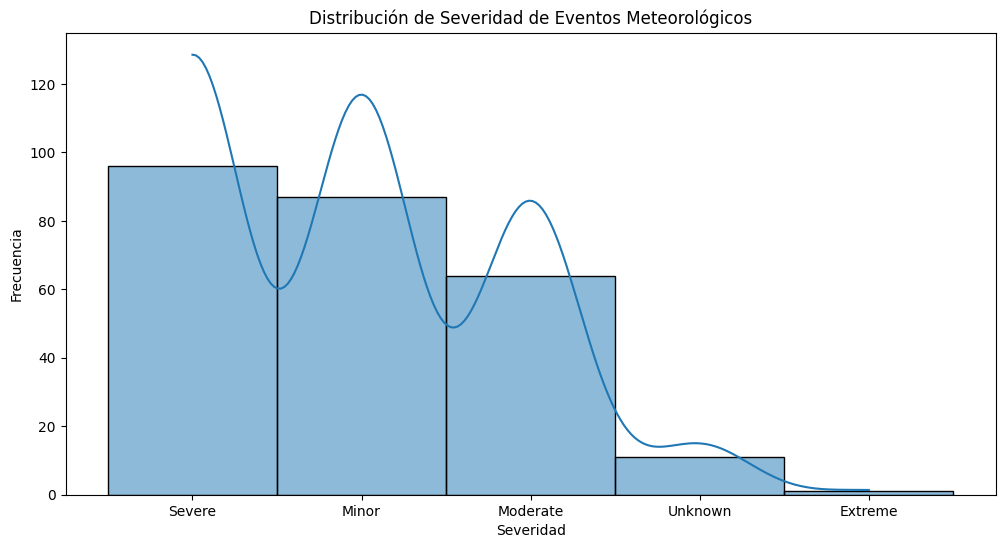

In [263]:
# Vemos primero la distribucion de Eventos segun la Severidad del mismo y la cantidad de Alertas
plt.figure(figsize=(12, 6))
sns.histplot(df_final['Severidad'], bins=30, kde=True)
plt.title('Distribución de Severidad de Eventos Meteorológicos')
plt.xlabel('Severidad')
plt.ylabel('Frecuencia')
plt.show()

In [264]:
# Vamos a tener en cuenta solo aquellos eventos donde la Severidad sea Mayor a 3 (Severe)
df_severo = df_final[df_final['SeveridadNumerica'] >=3]
df_evento = df_severo['Evento'].value_counts()
print("---Eventos donde la Severidad es Mayor a 'Severe'---")
df_evento

---Eventos donde la Severidad es Mayor a 'Severe'---


,count
Evento,
Flood Warning,22
Severe Thunderstorm Warning,20
Red Flag Warning,15
Severe Thunderstorm Watch,11
Extreme Heat Warning,10
Fire Weather Watch,6
Flash Flood Warning,5
Flood Watch,5
Extreme Heat Watch,2


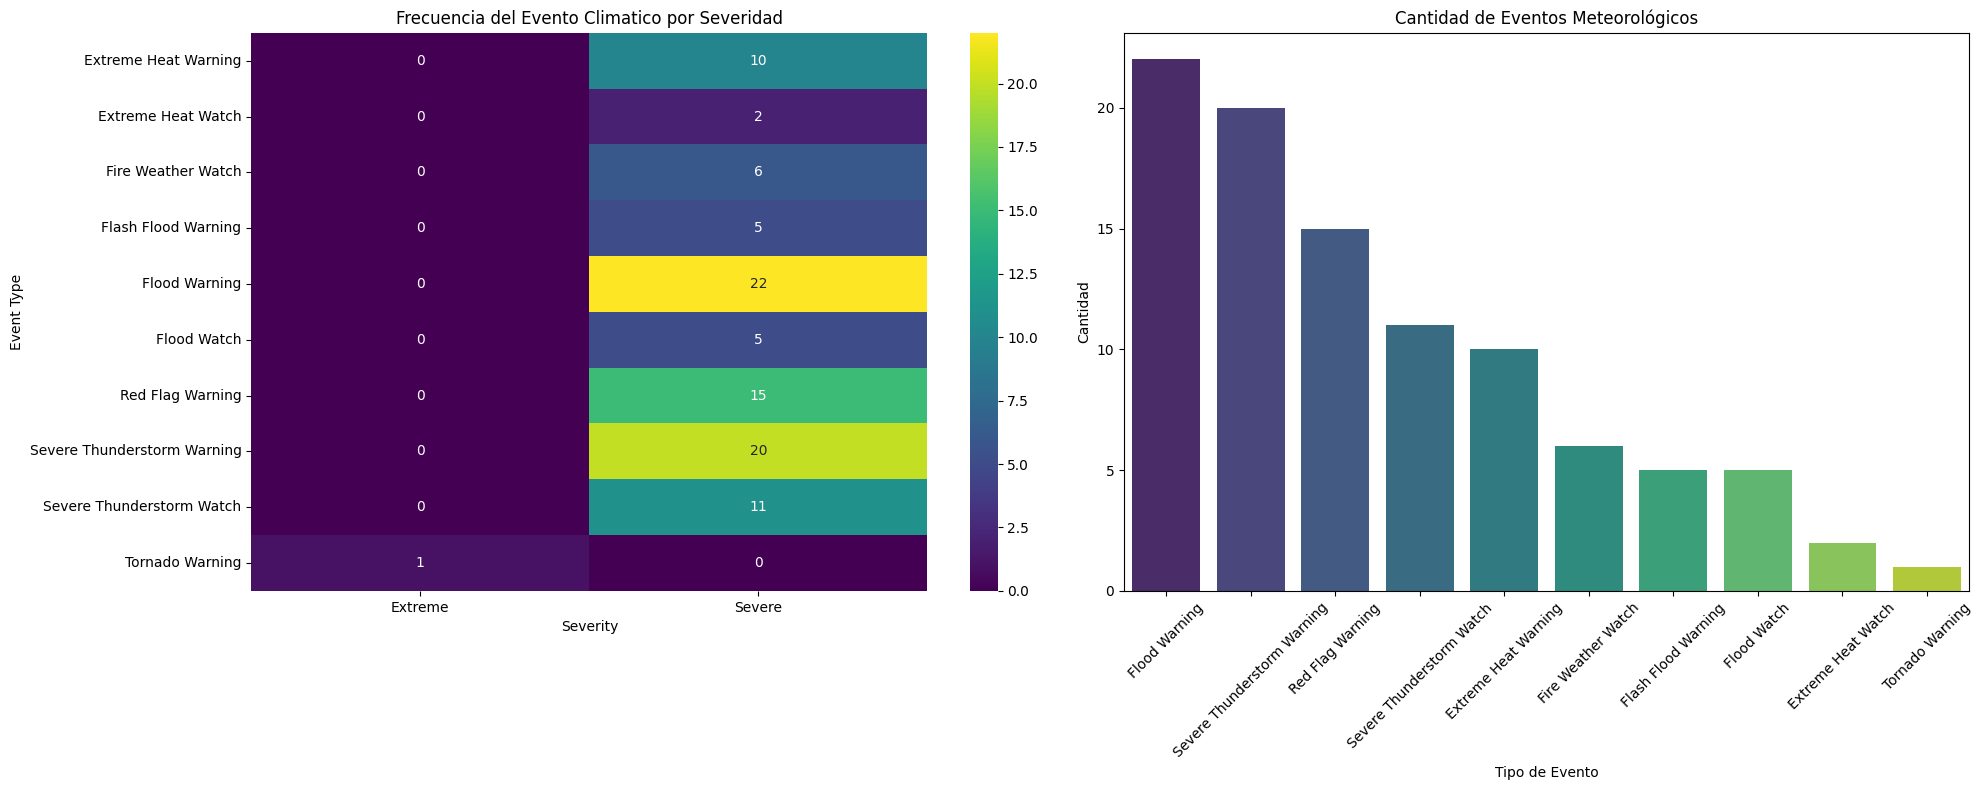

In [265]:
#  graficar un heatmap y grafico de barras del mismo tamaño y uno al lado del otro

# Calcular la frecuencia de eventos severos
event_counts = df_severo['Evento'].value_counts()

# Preparar los datos para el heatmap (Evento vs Severidad)
heatmap_data = df_severo.groupby(['Evento', 'Severidad']).size().unstack(fill_value=0)

# Configurar la figura y los subplots para dos gráficos uno al lado del otro
fig, axes = plt.subplots(1, 2, figsize=(20, 8)) # 1 fila, 2 columnas

# Gráfico 1: Heatmap
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='viridis', ax=axes[0])
axes[0].set_title('Frecuencia del Evento Climatico por Severidad')
axes[0].set_xlabel('Severity')
axes[0].set_ylabel('Event Type')
axes[0].tick_params(axis='y', rotation=0)

# Gráfico 2: Gráfico de barras
sns.barplot(x=event_counts.index, y=event_counts.values, palette='viridis', ax=axes[1])
axes[1].set_title('Cantidad de Eventos Meteorológicos')
axes[1].set_xlabel('Tipo de Evento')
axes[1].set_ylabel('Cantidad')
axes[1].tick_params(axis='x', rotation=45) # Rotar etiquetas del eje x para mejor legibilidad

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Pregunta 2: Segun la Severidad de la Alerta ¿cual es la Urgencia


Distribución de la columna 'Urgencia':
Urgencia
Immediate    43
Expected     30
Future       23
Past          1
Name: count, dtype: int64

Tabla de contingencia: Severidad vs Urgencia


Urgencia,Expected,Future,Immediate,Past
Severidad,,,,
Extreme,0,0,1,0
Severe,30,23,42,1


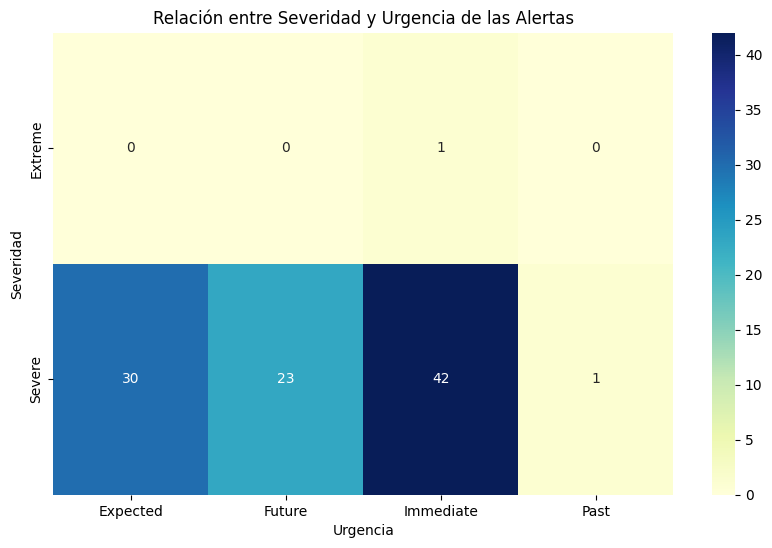

In [266]:
# Analizamos la relación entre Severidad y Urgencia
# Primero, veamos la distribución de la columna 'Urgencia'
print("\nDistribución de la columna 'Urgencia':")
print(df_severo['Urgencia'].value_counts())

# Creamos una tabla de contingencia o una agrupación para comparar Severidad y Urgencia
# Esto nos mostrará cuántas alertas hay para cada combinación de Severidad y Urgencia
df_urgencia_severidad = df_severo.groupby(['Severidad', 'Urgencia']).size().unstack(fill_value=0)

print("\nTabla de contingencia: Severidad vs Urgencia")
display(df_urgencia_severidad)

# Visualizamos la relación con un heatmap para entender mejor la concentración de alertas
plt.figure(figsize=(10, 6))
sns.heatmap(df_urgencia_severidad, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Relación entre Severidad y Urgencia de las Alertas')
plt.xlabel('Urgencia')
plt.ylabel('Severidad')
plt.show()


Pregunta 3: ¿Cuales son las Instruccionse que se deben comunicar a la Comunidad?

In [267]:
# Filtrar el DataFrame para obtener casos con severidad >= 3 y urgencia 'Immediate'
df_filtrado = df_severo[(df_severo['Urgencia'] == 'Immediate')].copy()

cuenta = df_filtrado['Urgencia'].value_counts()
print(f"Los casos de Urgencia 'Inmediata' son: {cuenta.values}")

# Seleccionar solo las columnas relevantes para las instrucciones
df_instrucciones_criticas = df_filtrado[['Evento', 'Severidad', 'Urgencia', 'Instrucciones']].copy()

print("--- DataFrame de Casos Críticos (Severidad >= 3 y Urgencia 'Immediate') donde las Instrucciones son las siguientes---")
df_filtra = df_filtrado[['Evento', 'Severidad', 'Urgencia', 'Instrucciones']].value_counts()

display(df_filtra)



Los casos de Urgencia 'Inmediata' son: [43]
--- DataFrame de Casos Críticos (Severidad >= 3 y Urgencia 'Immediate') donde las Instrucciones son las siguientes---


Evento                       Severidad  Urgencia   Instrucciones                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
Severe Thunderstorm Warning  Severe     Immediate  For your protection move to an interior room on the lowest floor of a\nbuilding.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      11
Flood Warning                Severe     Immediate  Turn around, don't drown when encountering flooded roads. Most flood\ndeaths occur in vehicles.\n\nCaution is urged when walking near riverbanks.                                                                                                                                                                                                                                                                                                                                                                                                                                                      5
Flash Flood Warning          Severe     Immediate  Turn around, don't drown when encountering flooded roads. Most flood\ndeaths occur in vehicles.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        4
Severe Thunderstorm Warning  Severe     Immediate  For your protection move to an interior room on the lowest floor of a\nbuilding.\n\nHeavy rainfall is occurring with this storm, and may lead to flash\nflooding. Do not drive your vehicle through flooded roadways.                                                                                                                                                                                                                                                                                                                                                                                  3
Flood Warning                Severe     Immediate  Motorists should not attempt to drive around barricades or drive\ncars through flooded areas.\n\nRiver forecasts are based on current conditions and rainfall\nforecasted to occur over the next 24 hours. During periods of\nflooding...Evening forecasts are reissued with updated rainfall\nforecasts.\n\nObserved and forecasted stage data plots are available on our\nAdvanced Hydrologic Prediction Service web page at...\nwww.weather.gov/lzk\n\nUnder the Current Conditions section...Select River and Lakes AHPS.\n\nThe next statement will be issued Tuesday morning at 1000 AM CDT.     2
Severe Thunderstorm Warning  Severe     Immediate  For your protection move to an interior room on the lowest floor of a\nbuilding.\n\nPlease report severe weather by calling 412-262-1988, p

# Conclusion Final ✅

Con este analisis hemos podido localizar cuales son las Alertas Climaticas de diferentes regiones en EUA para asi determinar segun las Alertas Activas cual es su nivel de Severidad, con que Urgencia se debe actuar y cuales son las Instrucciones a seguir para garantizar la seguridad de la Comunidad!!